In [4]:
import numpy as np
import time
import math
import modules as md
import nbodysolver as nbs

#------------------------------------------------------------------------------------------
#Units and conversions:
#------------------------------------------------------------------------------------------
#code units: Rsun, Msun, G=1, ...
c_SI       = 299792458.0        #m/s
M_sun_SI   = 1.989*(10.**30.)   #kg
R_sun_SI   = 695800000.         #m
AU_SI      = 149597871000.      #m 
G_new_SI   = 6.67*(10.**(-11.)) #m**3 kg**(-1) s**(-2)
AU_U       = AU_SI/R_sun_SI                             #from dist AU to code units (U)
kmsec_U    = 1000./np.sqrt(G_new_SI*M_sun_SI/R_sun_SI)  #from vel km/sec to code units (U)
time_U     = np.sqrt((R_sun_SI**3)/(G_new_SI*M_sun_SI)) #from code units(U) to time sec
Rsch_1Msun_unitRsun = ((2.*G_new_SI*(1.*M_sun_SI))/(c_SI**2.))/R_sun_SI

$$ R^{\frac{3 - n}{n}} M^{\frac{3 - n}{n}} = \frac{K}{G_{n}}$$

for $n = 3$

$$ M = \left(\frac{K}{0.3639} G \right)^{3/2} $$

and for $n = 1.5$

$$ R = \frac{K}{0.4242 G} \frac{1}{M^{1/3}} $$

from first equation we can obtain the value of K, use G = 1. 

$$ K = 0.3639 M^{2/3} $$

Choose $M = 10$

In [2]:
M = np.array([1, 5, 10])
K = 0.3639*M**(2./3)
print(K)

[0.3639     1.06405005 1.68907418]


This we can obtain the values of R in the case $n = 1.5$ for the different $K$ values


In [3]:
R = (K/(0.4242))*(M**(-1./3))
print(R)

[0.85785007 1.46690299 1.84818195]


## The units are $M_{\odot}$, $R_{\odot}$ , $G = 1$ 

## Define stars with different properties 

The coefficients for different equations of state are obtained by specifying the type of star, ("BH","NS","MS" or "WD")  

Particles contain information: name, mass, radi, spin, sdis = disruption spin, ntide = tidal coefficient, nspin = spin coefficient, info = information about the star 

In [2]:
#Main Sequence Stars
ms1 = md.Particle("MS",1,1, 0) #Type, mass, radius, spin
ms3 = md.Particle("MS",3,1.5, 0) 
ms5 = md.Particle("MS",5,3.5, 0) 
ms10 = md.Particle("MS", 10, 5.6, 0) 
#Let's add spin later

#Black holes
bh2 = md.Particle("BH",2,0,0)
bh5 = md.Particle("BH", 5, 0, 0)
bh10 = md.Particle("BH", 10, 0, 0)
bh100 = md.Particle("BH", 100,0,0)


#Particle with n = 1.5

#s1 = md.Particle("WD",1,0.85, 0) #Type, mass, radius, spin

s1 = md.Particle("WD",1,1, 0) #Type, mass, radius, spin

s5 = md.Particle("WD",5,1.46, 0) #Type, mass, radius, spin
s10 = md.Particle("WD",1,1.84, 0) #Type, mass, radius, spin



In [5]:
s1 = md.Particle("WD",1,1, 0) #Type, mass, radius, spin
bh2 = md.Particle("BH",2,0,0)


In [3]:
print(ms10.mass)

NameError: name 'ms10' is not defined

### Print some info 

In [164]:
print(ms1.name)
print(ms1.nspin)
print(ms5.nspin)
print(ms10.nspin)
print(ms10.ntide)

MS
0.009628666666666666
5.057156270833333
53.02812693845331
53.02812693845331


In [12]:
print(s10.nspin)


2.0145608866682196


##  Make Binaries

There is information about the binary:
period = period, 
orbd = orbital distance,
redvel = reduced velocity,
r = position,
v = velocity,
rochepri = Roche Lobe of the primary,
rochesec = Roche Lobe of the secondary,
rochefill = If one of the members has filled its Roche Lobe (True or False),
coll = collision,
tidalrpri = tidal disruption distance for primary,
tidalrsec = tidal disruption distance for secondary,

In [165]:
#Make binary MS1-BH5, MS3-BH5, MS5-BH5, MS5-BH10, MS10-BH10
#Eccentricity has not been implemented

ms1.spin = ms1.sdis/2 #Choose half the maximum spin for the star
bh5ms1 = md.Binary(bh5, ms1, 10, 0 ) ##primary, secondary, orbital distance (Rsun), eccentricity 

ms5.spin = ms5.sdis/2
bh10ms5 = md.Binary(bh10, ms5, 10, 0 )

ms10.spin = 2.*ms10.sdis/3
bh10ms10 = md.Binary(bh10, ms10, 20, 0 )

bh100ms1 = md.Binary(bh100, ms1, 10,0)

bh100ms10 = md.Binary(bh100, ms10, 20,0)

In [22]:
0.999**10000


4.517334597704824e-05

## BH2S1 

In [6]:
bh2s1 = md.Binary(bh2, s1, 10, 0 ) ##primary, secondary, orbital distance (Rsun), eccentricity 
dtidal = bh2s1.tidalrsec

In [7]:
print(dtidal)

1.2599210498948732


In [8]:
dtidal*3.6

4.535715779621544

In [9]:
bh2s1r3_5 = md.Binary(bh2, s1, dtidal*3.5, 0)

bh2s1r4_7 = md.Binary(bh2, s1, dtidal*4.7, 0)

In [10]:
print(bh2s1r3_5.r)
print(bh2s1r4_7.r)

[[ 1.46990789  0.          0.        ]
 [-2.93981578  0.          0.        ]]
[[ 1.97387631  0.          0.        ]
 [-3.94775262  0.          0.        ]]


In [16]:
NP = 100 #Number of periods in code units you want to simulate
tfinal = NP*bh2s1r3_5.periodct #Final time in code units
Nsteps = int(5*NP*tfinal) #Fix the first coefficient to change accuracy 
dt = tfinal/(Nsteps-1)  # fixed time step

r,v = nbs.Hermite4th(bh2,s1, bh2s1r3_5, Nsteps, dt)

In [17]:
print(dt)

0.0020000020434338905



Bad key "text.kerning_factor" on line 4 in
/home/irvin/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


NameError: name 'r' is not defined

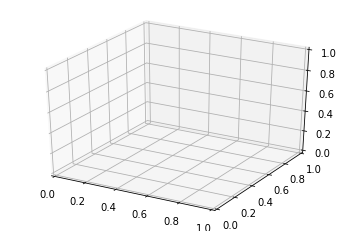

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(r[0][0], r[0][1], r[0][2], 'r', linewidth=1)# Plot the BH orbit
ax.plot(r[1][0], r[1][1], r[1][2], 'b', linewidth=1)# Plot the star orbit
#ax.scatter3D(simulation[0][0][0], simulation[0][0][1], simulation[0][0][2], 'o', c='black') #s=100
#ax.scatter3D(simulation[2][0][0], simulation[2][0][1], simulation[2][0][2], 'o', c='black') #s=10
ax.legend()
#ax.set_xticks([])
#ax.set_yticks([])
#ax.set_zticks([])
#ax.set_xlim3d(min(min(posbh1x), min(posbh2x)), max(max(posbh1x), max(posbh2x)))
#ax.set_ylim3d(min(min(posbh1y), min(posbh2y)), max(max(posbh1y), max(posbh2y)))
#ax.set_zlim3d(min(min(posbh1z), min(posbh2z)), max(max(posbh1z), max(posbh2z)))
#ax.set_xlabel('')
#ax.set_ylabel('')
#ax.set_zlabel('')


#plt.savefig('starbh-withoutspin.eps', format='eps')#, dpi=200

plt.show()

In [ ]:
0.99999

In [151]:
ecce = 0.99999
mean = 0 #(1./2)*np.pi

runsim = np.array([350000,470000])#Run sim at [3.5,4.7] tidal radius

bh2s1r3_5e = md.Binaryecc(bh2, s1, dtidal*runsim[0], ecce, mean)

bh2s1r4_7e = md.Binaryecc(bh2, s1, dtidal*runsim[1], ecce, mean)

In [152]:
print(dtidal*3.5)
print(dtidal*4.7)

4.4097236746320565
5.921628934505904


In [153]:
print(bh2s1r3_5e.r)
print(bh2s1r4_7e.r)

[[ 1.46990789 -0.         -0.        ]
 [-2.93981578  0.          0.        ]]
[[ 1.97387631 -0.         -0.        ]
 [-3.94775262  0.          0.        ]]


In [148]:
np.linalg.norm(bh2s1r3_5e.r[0] - bh2s1r3_5e.r[1]) 

7.713051869225714

In [149]:
np.linalg.norm(bh2s1r4_7e.r[0] - bh2s1r4_7e.r[1]) 

10.35752679581739

In [150]:
np.linalg.norm(bh2s1r3_5e.r[0] - bh2s1r3_5e.r[1]) 

7.713051869225714

In [199]:
NP = 30 #Number of periods in code units you want to simulate
tfinal = NP*bh2s1r3_5.periodct #Final time in code units
Nsteps = int(1*NP*tfinal) #Fix the first coefficient to change accuracy 
dt = tfinal/(Nsteps-1)  # fixed time step


In [200]:
print(Nsteps)
print(dt)

30232
0.03333535211026658


In [201]:
r,v = nbs.Hermite4th(bh2,s1, bh2s1r3_5e, Nsteps, dt)

In [210]:
print(len(r[0][0]))

30232


In [1]:
nf = Nsteps 
print(np.linalg.norm(r[0].T[nf] - r[1].T[nf]))

NameError: name 'Nsteps' is not defined

No handles with labels found to put in legend.


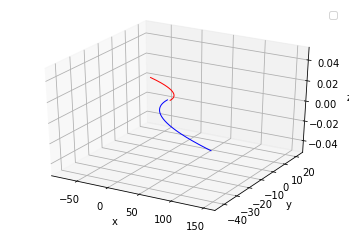

In [202]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(r[0][0], r[0][1], r[0][2], 'r', linewidth=1)# Plot the BH orbit
ax.plot(r[1][0], r[1][1], r[1][2], 'b', linewidth=1)# Plot the star orbit
#ax.scatter3D(simulation[0][0][0], simulation[0][0][1], simulation[0][0][2], 'o', c='black') #s=100
#ax.scatter3D(simulation[2][0][0], simulation[2][0][1], simulation[2][0][2], 'o', c='black') #s=10
ax.legend()
#ax.set_xticks([])
#ax.set_yticks([])
#ax.set_zticks([])
#ax.set_xlim3d(-1,1)
#ax.set_ylim3d(-1,1)
#ax.set_xlim3d(min(min(posbh1x), min(posbh2x)), max(max(posbh1x), max(posbh2x)))
#ax.set_ylim3d(min(min(posbh1y), min(posbh2y)), max(max(posbh1y), max(posbh2y)))
#ax.set_zlim3d(min(min(posbh1z), min(posbh2z)), max(max(posbh1z), max(posbh2z)))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


#plt.savefig('starbh-withoutspin.eps', format='eps')#, dpi=200

plt.show()

# Choose a distance in terms of tidal radius to choose set up

# BH5 MS1

In [71]:
bh5ms1 = md.Binary(bh5, ms1, 10, 0 ) ##primary, secondary, orbital distance (Rsun), eccentricity 
dtidal = bh5ms1.tidalrsec
print(dtidal)

NameError: name 'bh5' is not defined

In [169]:
#bh5ms1.orbd = ntidalrad*dtidal ##primary, secondary, orbital distance (Rsun), eccentricity 
bh5ms1 = md.Binary(bh5, ms1, ntidalrad*dtidal,0)
print(bh5ms1.tidalrsec)
print(bh5ms1.orbd)
print(bh5ms1.tideeffsec)

1.7099759466766968
6.839903786706787
2.8942010856857278e-05


# BH5 S1

In [47]:
bh5s1 = md.Binary(bh5, s1, 10, 0 ) ##primary, secondary, orbital distance (Rsun), eccentricity 
dtidal = bh5s1.tidalrsec
print(dtidal)

1.4534795546751922


In [48]:
#bh5ms1.orbd = ntidalrad*dtidal ##primary, secondary, orbital distance (Rsun), eccentricity 
bh5s1 = md.Binary(bh5, s1, ntidalrad*dtidal,0)
print(bh5s1.tidalrsec)
print(bh5s1.orbd)
print(bh5s1.tideeffsec)

1.4534795546751922
7.267397773375961
9.408139916693397e-05


# BH10 MS5 

In [170]:
bh10ms5 = md.Binary(bh10, ms5, 10, 0 )
dtidal = bh10ms5.tidalrsec
print(dtidal)

4.4097236746320565


In [171]:
#bh10ms5.orbd = ntidalrad*dtidal ##primary, secondary, orbital distance (Rsun), eccentricity 
bh10ms5 = md.Binary(bh10, ms5, ntidalrad*dtidal,0)
print(bh10ms5.tidalrsec)
print(bh10ms5.orbd)
print(bh10ms5.tideeffsec)

4.4097236746320565
17.638894698528226
5.3311639815327074e-05


# BH10 S5 

In [49]:
bh10s5 = md.Binary(bh10, s5, 10, 0 )
dtidal = bh10s5.tidalrsec
print(dtidal)

1.8394847328465147


In [50]:
#bh10ms5.orbd = ntidalrad*dtidal ##primary, secondary, orbital distance (Rsun), eccentricity 
bh10s5 = md.Binary(bh10, s5, ntidalrad*dtidal,0)
print(bh10s5.tidalrsec)
print(bh10s5.orbd)
print(bh10s5.tideeffsec)

1.8394847328465147
9.197423664232574
0.00017329941898357206


# BH10 MS10

In [172]:
bh10ms10 = md.Binary(bh10, ms10, 20, 0 )
dtidal = bh10ms10.tidalrsec
print(dtidal)

5.6


In [243]:
#bh10ms10.orbd = ntidalrad*dtidal ##primary, secondary, orbital distance (Rsun), eccentricity 
bh10ms10 = md.Binary(bh10, ms10, ntidalrad*dtidal,0)
print(bh10ms10.tidalrsec)
print(bh10ms10.orbd)
print(bh10ms10.tideeffsec)

5.6
48.259337056714195
0.0007961229335817612


In [ ]:
print(bh10ms10.orbd)
print(bh10ms10.periodct)
print(bh10ms10.v/kmsec_U)
print(bh10ms10.r)


# BH10 S10

In [51]:
bh10s10 = md.Binary(bh10, s10, 20, 0 )
dtidal = bh10s10.tidalrsec
print(dtidal)

3.964159829658666


In [52]:
#bh10ms10.orbd = ntidalrad*dtidal ##primary, secondary, orbital distance (Rsun), eccentricity 
bh10s10 = md.Binary(bh10, s10, ntidalrad*dtidal,0)
print(bh10s10.tidalrsec)
print(bh10s10.orbd)
print(bh10s10.tideeffsec)

3.964159829658666
19.820799148293332
5.9267567606991004e-05


#  BH100 MS1

In [174]:
bh100ms1 = md.Binary(bh100, ms1, 10,0)
dtidal = bh100ms1.tidalrsec
print(dtidal)

4.641588833612778


In [175]:
#bh100ms1.orbd = ntidalrad*dtidal ##primary, secondary, orbital distance (Rsun), eccentricity 
bh100ms1 = md.Binary(bh100, ms1, ntidalrad*dtidal,0)
print(bh100ms1.tidalrsec)
print(bh100ms1.orbd)
print(bh100ms1.tideeffsec)

4.641588833612778
18.566355334451114
3.928035206476722e-06


#  BH100 MS10

In [176]:
bh100ms10 = md.Binary(bh100, ms10, 20,0)
dtidal = bh100ms10.tidalrsec
print(dtidal)

12.064834264178549


In [177]:
#bh100ms10.orbd = ntidalrad*dtidal ##primary, secondary, orbital distance (Rsun), eccentricity 
bh100ms10 = md.Binary(bh100, ms10, ntidalrad*dtidal,0)
print(bh100ms10.tidalrsec)
print(bh100ms10.orbd)
print(bh100ms10.tideeffsec)

12.064834264178549
48.259337056714195
1.823232435242021e-05


#  BH100 MS10

In [32]:
bh100s10 = md.Binary(bh100, s10, 20,0)
dtidal = bh100s10.tidalrsec
print(dtidal)

8.540523453847513


In [33]:
#bh100ms10.orbd = ntidalrad*dtidal ##primary, secondary, orbital distance (Rsun), eccentricity 
bh100s10 = md.Binary(bh100, s10, ntidalrad*dtidal,0)
print(bh100s10.tidalrsec)
print(bh100s10.orbd)
print(bh100s10.tideeffsec)

8.540523453847513
34.16209381539005
3.896731678659407e-05


# Spin effects

In [235]:
ntidalspin = (1./2)
ntidalrad = 4

In [236]:
sdis = ms1.sdis
ms1.spin = ntidalspin*sdis

sdis = ms5.sdis
ms5.spin = ntidalspin*sdis

sdis = ms10.sdis
ms10.spin = ntidalspin*sdis

# BH5 MS1

In [237]:
dtidal = bh5ms1.tidalrsec
bh5ms1 = md.Binary(bh5, ms1, ntidalrad*dtidal,0)
print(bh5ms1.tidalrsec)
print(bh5ms1.orbd)
print(bh5ms1.tideeffsec)
print(bh5ms1.spineffsec)

1.7099759466766968
6.839903786706787
2.8942010856857278e-05
7.717869561828605e-05


# BH10 MS5

In [238]:
dtidal = bh10ms5.tidalrsec
bh10ms5 = md.Binary(bh10, ms5, ntidalrad*dtidal,0)
print(bh10ms5.tidalrsec)
print(bh10ms5.orbd)
print(bh10ms5.tideeffsec)
print(bh10ms5.spineffsec)

4.4097236746320565
17.638894698528226
5.3311639815327074e-05
0.00014216437284087226


# BH10 MS10

In [239]:
dtidal = bh10ms10.tidalrsec
bh10ms10 = md.Binary(bh10, ms10, ntidalrad*dtidal,0)
print(bh10ms10.tidalrsec)
print(bh10ms10.orbd)
print(bh10ms10.tideeffsec)
print(bh10ms10.spineffsec)

5.6
22.4
8.462695312499999e-05
0.000225671875


# BH100 MS1

In [240]:
dtidal = bh100ms1.tidalrsec
bh100ms1 = md.Binary(bh100, ms1, ntidalrad*dtidal,0)
print(bh100ms1.tidalrsec)
print(bh100ms1.orbd)
print(bh100ms1.tideeffsec)
print(bh100ms1.spineffsec)

4.641588833612778
18.566355334451114
3.928035206476722e-06
1.047476055060459e-05


# BH100 MS10

In [241]:
dtidal = bh100ms10.tidalrsec
bh100ms10 = md.Binary(bh100, ms10, ntidalrad*dtidal,0)
print(bh100ms10.tidalrsec)
print(bh100ms10.orbd)
print(bh100ms10.tideeffsec)
print(bh100ms10.spineffsec)

12.064834264178549
48.259337056714195
1.823232435242021e-05
4.861953160645388e-05


In [22]:
#Make binary MS1-BH5, MS3-BH5, MS5-BH5, MS5-BH10, MS10-BH10
#Eccentricity has not been implemented

ntidalrad = 3

ms1.spin = ms1.sdis/2 #Choose half the maximum spin for the star
bh5ms1 = md.Binary(bh5, ms1, ntidalrad*(bh5ms1.tidalrsec), 0 ) ##primary, secondary, orbital distance (Rsun), eccentricity 

ms5.spin = ms5.sdis/2
bh10ms5 = md.Binary(bh10, ms5, ntidalrad*(bh10ms5.tidalrsec), 0 )

ms10.spin = 2.*ms10.sdis/3
bh10ms10 = md.Binary(bh10, ms10, ntidalrad*(bh10ms10.tidalrsec), 0 )

bh100ms10 = md.Binary(bh10, ms10, ntidalrad*(bh100ms10.tidalrsec), 0 )

bh100ms1 = md.Binary(bh10, ms10, ntidalrad*(bh100ms1.tidalrsec), 0 )




### Tidal radius

In [34]:
#print(bh5ms1.tidalrsec)
#print(bh10ms5.tidalrsec)
#print(bh10ms10.tidalrsec)
print(bh100ms1.tidalrsec)
print(bh100ms10.tidalrsec)


5.6
5.6


In [29]:
print(ms10.mass)
print(ms10.radi)
print(ms1.mass)
print(ms1.radi)

10
5.6
1
1


In [45]:
bh100ms1 = md.Binary(bh100, ms1, 10,0)


In [46]:
print(bh100ms1.tidalrsec)

4.641588833612778


In [47]:
bh10ms1 = md.Binary(bh10,ms1,10,0)

In [48]:
bh10.mass
bh100.mass

100

In [49]:
print(bh100ms1.tidalrsec)

4.641588833612778


### Period 

In [43]:
print(bh5ms1.period)
print(bh10ms10.period)

0.5496721243302958
1.7842733082828859


### Roche Lobe 

In [44]:
print(bh10ms10.rochepri)
print(bh10ms10.rochesec)
print(bh10ms10.rochefill)

6.3658647087916655
6.3658647087916655
False


## Measure contribution of corrections 

from 

$$
    m_{\star} \dot{\vec{v}} = -\frac{G m_{\star} m_{\bullet} \hat{r}}{r^2} - \frac{3 n_{\Omega} m_{\bullet} \Omega^2 \hat{r}}{2r^4} - \frac{9 n_{E} G^2 m^2_{\bullet} \hat{r}}{r^7}
$$

we substract the Newtonian part 

$$
    m_{\star} \dot{\vec{v}} = -\frac{G m_{\star} m_{\bullet} \hat{r}}{r^2} \left(1 + \frac{3 n_{\Omega} \Omega^2}{2 m_{\star}r^2} + \frac{9 n_{E}  m_{\bullet}}{m_{\star}r^5} \right) 
$$

Thus, we can evaluate the rest of the terms with respect to unity

$$ n_{E} = (3/2)kGl^5 $$

$l$ es radio estrella

## Spin contribution

In [45]:
print(bh5ms1.spineffsec)
print(bh10ms5.spineffsec)
print(bh10ms10.spineffsec)


0.00013720656998806409
0.0002527366628282173
0.0007132345679012346


## Tides contribution


In [64]:
print(bh5ms1.tideeffsec)
print(bh10ms5.tideeffsec)
print(bh10ms10.tideeffsec)
print(bh100ms1.tideeffsec)

ms10.spin = 0

0.00012196139554494594
0.00022465481140285977
0.0003566172839506174
1.655270803058504e-05


In [49]:
#ms10.spin = 2.*ms10.sdis/3
bh10ms10 = md.Binary(bh10, ms10, 2*(bh10ms10.tidalrsec), 0 )
print(bh10ms10.tideeffsec)

0.0027080624999999995


# Run simulation 

In [36]:
NP = 100 #Number of periods in code units you want to simulate
tfinal = NP*bh10ms10.periodct #Final time in code units
Nsteps = int(5*NP*tfinal) #Fix the first coefficient to change accuracy 
dt = tfinal/(Nsteps-1)  # fixed time step

r,v = nbs.Hermite4th(bh10,ms10, bh10ms10, Nsteps, dt)


No handles with labels found to put in legend.


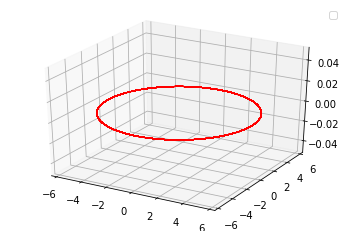

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(r[0][0], r[0][1], r[0][2], 'r', linewidth=1)# Plot the BH orbit
#ax.plot(r_res[1][0], r_res[1][1], r_res[1][2], 'b', linewidth=1)# Plot the star orbit
#ax.scatter3D(simulation[0][0][0], simulation[0][0][1], simulation[0][0][2], 'o', c='black') #s=100
#ax.scatter3D(simulation[2][0][0], simulation[2][0][1], simulation[2][0][2], 'o', c='black') #s=10
ax.legend()
#ax.set_xticks([])
#ax.set_yticks([])
#ax.set_zticks([])
#ax.set_xlim3d(min(min(posbh1x), min(posbh2x)), max(max(posbh1x), max(posbh2x)))
#ax.set_ylim3d(min(min(posbh1y), min(posbh2y)), max(max(posbh1y), max(posbh2y)))
#ax.set_zlim3d(min(min(posbh1z), min(posbh2z)), max(max(posbh1z), max(posbh2z)))
#ax.set_xlabel('')
#ax.set_ylabel('')
#ax.set_zlabel('')


#plt.savefig('starbh-withoutspin.eps', format='eps')#, dpi=200

plt.show()